In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
from sklearn.impute import SimpleImputer

In [2]:
fileName = 'vehicles.csv'

In [3]:
car = pd.read_csv(fileName, engine='python')
car.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')

In [16]:
# For initial modeling we are dropping data that requires significant manipulation
cardata = car.copy()
columns_to_drop = ['id', 'url', 'region', 'region_url', 'model','vin', 
       'image_url', 'description', 'county', 'lat', 'long']

In [17]:
cardata = car.drop(columns=columns_to_drop)

In [18]:
# Removing data corresponding to very high prices for even regular cars. 
# Some prices are like 123456789 etc, so we remove around 750 data entries for cars with prices greater than
# 100000 cars
cardata = cardata[cardata.price < 1e6]
# Convert year to age and removing 'year' columns
cardata["age"] = pd.datetime.now().year - cardata["year"]
cardata = cardata.drop(columns="year")

C:\Users\subint\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [19]:
cardata = cardata[cardata['price'] >= 100]

In [20]:
cardata = cardata[cardata.age < 40]
cardata.corr()
# This correlation makes sense, the price decreases with increased age and odometer reading - therefore the correlation coefficients are -ve
# Similarly a older vehicle has a higher odometer reading - hence the correlation coefficients are +ve

,price,odometer,age
price,1.000000,-0.255527,-0.446289
odometer,-0.255527,1.000000,0.322902
age,-0.446289,0.322902,1.000000


In [51]:
mostPopularCarsSold = cardata["manufacturer"].value_counts().index
mostPopularCarsSold = mostPopularCarsSold.values[:9]

In [58]:
popularCars = cardata.loc[cardata["manufacturer"].isin(mostPopularCarsSold)]

(0, 100000.0)

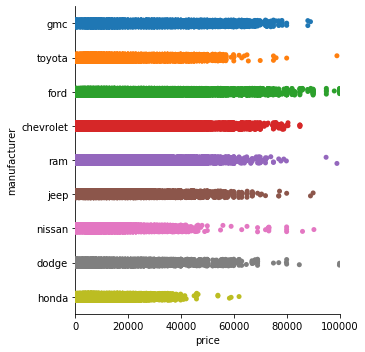

In [88]:
man_price = sns.catplot(y="manufacturer", x="price", data=popularCars)
plt.xlim(0,1e5)

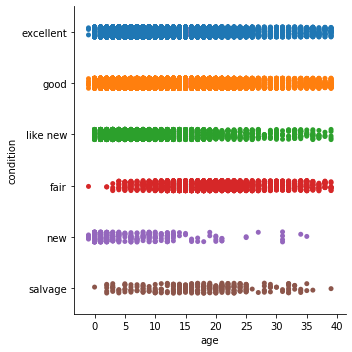

In [89]:
sns.catplot(x="age", y="condition", data=popularCars)

In [107]:
stateData = cardata["state"].value_counts().index
stateData = stateData.values[:9]

In [108]:
stateD = cardata.loc[cardata["state"].isin(stateData)]

(0, 100000.0)

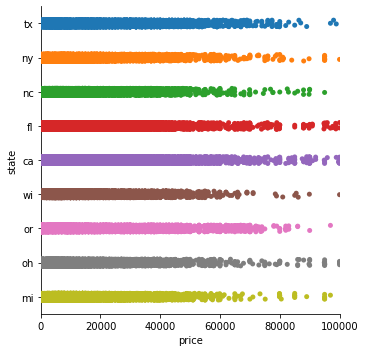

In [109]:
sns.catplot(x='price',y='state',data=stateD)
plt.xlim(0,1e5)

In [131]:
stateD.groupby('state').agg({'price': ['median', 'mean', 'count']}).sort_values([('price', 'median')], ascending=False)

price                     
      median          mean  count
state                            
tx     13988  16636.311215  14543
ca     12999  16667.218147  26010
nc     11949  14775.109457   9739
fl     11796  15335.617611  19624
ny     10500  13575.930129  12523
mi     10200  13625.426443  12419
or      9995  14883.403840  10051
wi      9995  13157.391060  10157
oh      8877  12332.228796  12863

In [201]:
state_table = cardata.groupby('state').agg({'price': ['median', 'mean', 'count'],'odometer': ['median', 'mean'],'age': ['median', 'mean']}).sort_values([('price', 'median')], ascending=False).round(1)
state_table["odp"] = state_table["odometer"]["median"] / state_table["price"]["median"]
state_table["odp"] = (state_table["odp"] - state_table["odp"].min())/(state_table["odp"].max() - state_table["odp"].min())

In [202]:
state_table.sort_values(('price','mean'), ascending=False)

price                  odometer              age             odp
        median     mean  count    median      mean median  mean          
state                                                                    
wa     21500.0  25371.4   9010   51170.0   70154.0    4.0   6.8  0.000000
wy     17000.0  23769.3    596  109498.0  118894.7    8.0   9.8  0.381744
mt     17000.0  20228.5   6178   87587.0   97924.1    6.0   8.2  0.260588
id     15990.0  20025.4   6572   74241.0   85032.4    6.0   7.5  0.212721
ut     12950.0  19818.8    780   81008.5   93855.7    7.0   9.2  0.364300
wv     13990.0  19795.8    497  108632.0  120161.4   10.0  10.8  0.506194
az     12995.0  19341.5   3998   84596.0   94778.0    7.0   8.9  0.388214
ak     16988.0  18937.1   3480   55303.5   71193.8    6.0   7.4  0.082293
ar     14900.0  18289.4   2910   77229.5   92956.9    6.0   7.8  0.263503
nm     12700.0  17711.3   2957   90692.5   97672.9    8.0   9.8  0.447553
sd     13000.0  17466.8   1323  100402.5  107697.6   10.0  10.4  0.502273
nd     13990.0  17431.1    375  118856.0  125563.6    9.0  10.3  0.574890
ca     12999.0  16667.2  26010   84656.5   92713.3    7.0   8.7  0.388463
tx     13988.0  16636.3  14543   86189.0  107653.3    7.0   8.1  0.355478
hi     13995.0  16100.2   1446   43850.5   60270.1    6.0   7.3  0.070811
ok     11995.0  16077.5   4348  104950.0  113802.1    8.0   9.1  0.598738
nv     12900.0  16072.2   2105   77385.0   85163.0    7.0   9.0  0.340175
mo     11900.0  15883.6   3415   97681.0  107788.3    7.0   8.6  0.547884
vt     11998.0  15566.9   1970   99000.0  101134.9    8.0   9.1  0.551916
al     12897.0  15389.4   4168  100810.5  109792.2    8.0   8.9  0.511045
co     12500.0  15340.0   7511   99524.5  108055.2    8.0  10.0  0.524711
fl     11796.0  15335.6  19624   90000.0   97198.1    8.0   9.0  0.493478
tn     12900.0  15224.8   8166   97335.0  104316.0    7.0   8.5  0.485549
sc     11500.0  15224.0   4529   99000.0  107513.6    9.0   9.9  0.585504
la     10495.0  14969.5   2140  106000.0  115162.4    8.0   9.5  0.725693
nj     10995.0  14925.5   8024   89295.0   97378.2    8.0   9.1  0.539700
or      9995.0  14883.4  10051   92327.0   99288.1    8.0   9.2  0.644596
ks     10995.0  14880.4   3998  109128.0  112531.3    8.0   9.2  0.709261
in     11000.0  14874.7   4876   95592.0  102176.6    8.0   9.6  0.593164
nh     11900.0  14856.0   2154  102016.5  104898.0    8.0   9.7  0.582132
nc     11949.0  14775.1   9739   97528.0  105808.0    8.0   9.4  0.543517
me     11000.0  14717.5   2023  106090.0  107858.8    9.0   9.8  0.682875
ne     13890.0  14693.9   1792  114486.5  115405.3    8.0   8.8  0.551069
ky     11500.0  14379.1   3685   96234.0  102438.0    8.0   9.1  0.562895
md     11495.0  14130.4   3457   89848.0   97784.2    8.0   9.6  0.511015
ms     10982.5  14092.3   1066  129315.0  132867.9    9.0  10.6  0.883107
ia     10725.0  13838.8   7084  101131.0  106819.4    8.0   9.4  0.662658
ri      9995.0  13763.8   2057  109820.0  113605.3    9.0  10.2  0.809114
mi     10200.0  13625.4  12419  112020.0  109679.1    8.0   8.6  0.808631
ny     10500.0  13575.9  12523   91406.0   96437.7    9.0   9.9  0.594588
wi      9995.0  13157.4  10157  104000.0  108196.7    9.0   9.9  0.754378
de      8995.0  13120.8    627  110648.0  111165.8   11.0  11.4  0.932590
il      9950.0  13118.3   6498  100812.0  107541.4    8.0   9.3  0.728683
ga      8999.5  12992.6   3450  114570.0  122493.5    9.0  10.4  0.972978
ma      9500.0  12686.1   5312  101409.5  107137.7    9.0  10.3  0.779710
ct      8995.0  12587.9   4104  105242.5  108920.5   10.0  10.6  0.876101
mn      9000.0  12504.0   5486  114961.5  119115.6   10.0  10.2  0.977001
oh      8877.0  12332.2  12863  100765.0  107821.2    9.0   9.9  0.843307
va      8890.0  12043.9   7536  113370.0  115384.6   10.0  10.4  0.975030
pa      8500.0  11987.1   9283  103355.0  107618.1   10.0  10.6  0.919276
dc      8200.0  11191.3   1767  106749.0  110111.9   10.0  10.8  1.000000

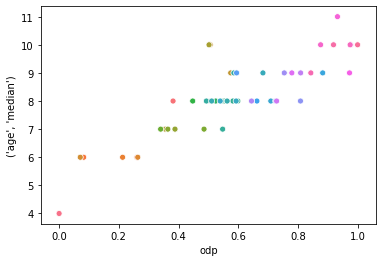

In [203]:
sns.scatterplot(y=('age', 'median'), x='odp', hue=state_table.index, data=state_table)
plt.legend([],[], frameon=False)